In [20]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("default of credit card clients.xls", index_col = 0, header=1, names=['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default_payment_next_month'])

In [ ]:
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [ ]:
df['MARRIAGE'].value_counts().head(10)

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
df['SEX'].value_counts().head(10)

2    18112
1    11888
Name: SEX, dtype: int64

In [4]:
#combining values for certain education numbers 
df.loc[df['EDUCATION'] == 0, 'EDUCATION'] = 4
df.loc[df['EDUCATION'] == 5, 'EDUCATION'] = 4
df.loc[df['EDUCATION'] == 6, 'EDUCATION'] = 4

df['EDUCATION'].value_counts().head(10)

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [5]:
print(df.shape)

(30000, 24)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [7]:
#checking for null values
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

In [8]:
# Onehot encoding using pandas get_dummies. 
onehot_columns = ['SEX','EDUCATION','MARRIAGE']
df = pd.get_dummies(df, columns = onehot_columns)

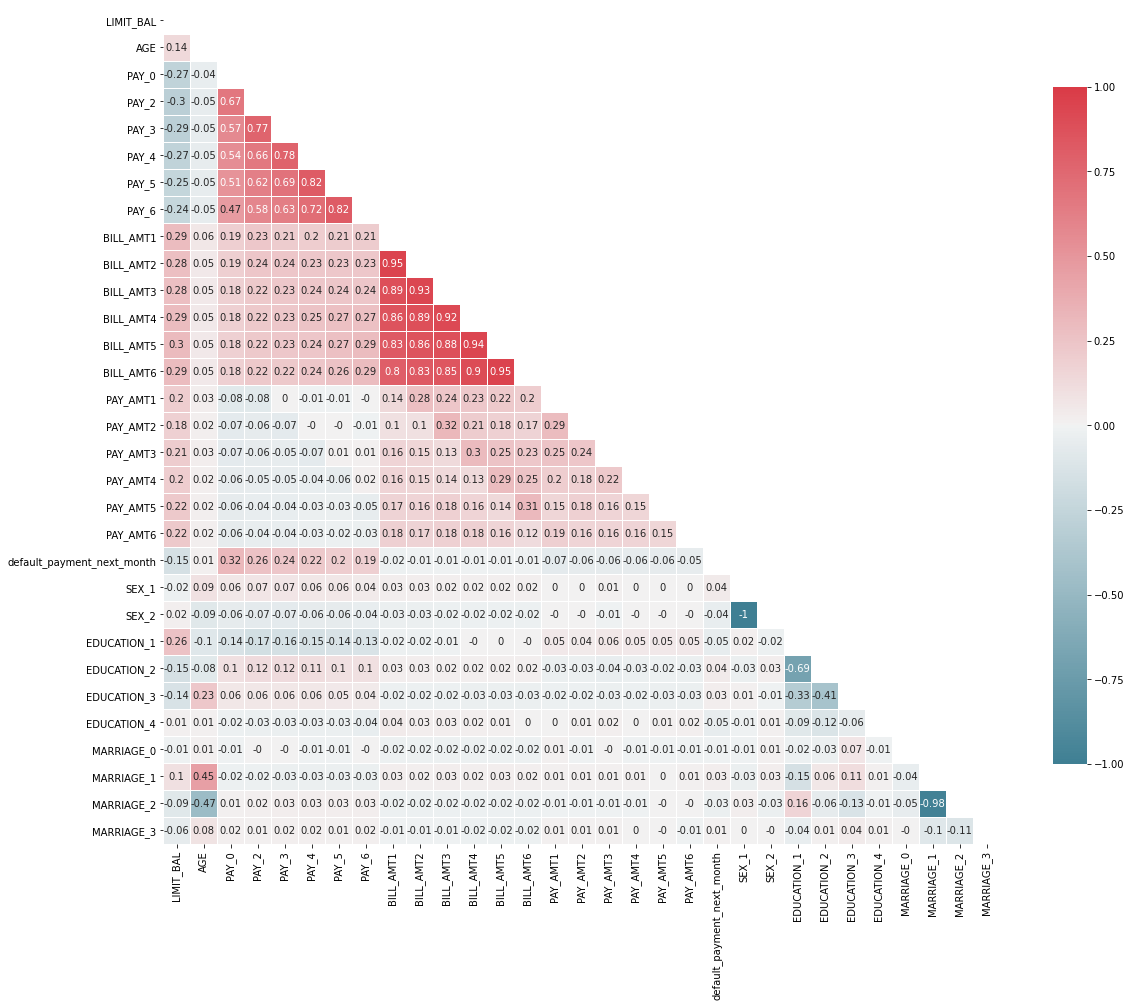

In [ ]:
corr = df.corr(method='pearson').round(2)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(17, 17))

c_map = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=c_map, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .6}, annot=True)

plt.tight_layout()

In [9]:
#bill Amounts are highly correlated
df.drop(['BILL_AMT2'], axis = 1, inplace = True)
df.drop(['BILL_AMT3'], axis = 1, inplace = True)
df.drop(['BILL_AMT4'], axis = 1, inplace = True)
df.drop(['BILL_AMT5'], axis = 1, inplace = True)
df.drop(['BILL_AMT6'], axis = 1, inplace = True)

In [10]:
#train test split
y = df['default_payment_next_month']
X = df.drop(['default_payment_next_month'], axis = 1) 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
# apply MinMaxScaler on train data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [21]:
#create log regression model
model = LogisticRegression()
model.fit(X_train_scale,y_train)
predictions = model.predict(X_test_scale)

In [13]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
print("Accuracy:",metrics.accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.71      0.23      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

Accuracy: 0.8108333333333333


In [15]:
f = f1_score(y_test, predictions)
npre = precision_score(y_test, predictions)
nre = recall_score(y_test, predictions)

print("f-1 Score:",f)
print("Precision Score:",npre)
print("Recall Score:",nre)

f-1 Score: 0.3488238668961561
Precision Score: 0.7069767441860465
Recall Score: 0.23153084539223154


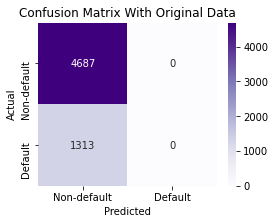

In [16]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,model.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Purples", fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix With Original Data");

In [17]:
from sklearn.model_selection import RandomizedSearchCV


features = df.drop('default_payment_next_month', axis = 1, inplace = False)

#standard deviation
stdX = (features - features.mean()) / (features.std())

#logistic regression model
logreg = LogisticRegression()

#hyperperimeter grid
param_grid = {'C': np.logspace(-5, 8, 15)}

logreg_cv_std = RandomizedSearchCV(logreg,param_grid , cv=5, random_state=42)

#standardizing data
y = df['default_payment_next_month']
X = df.drop(['default_payment_next_month'], axis = 1)
Xstd_train,Xstd_test,ystd_train,ystd_test=train_test_split(stdX,y,test_size=0.2,random_state=42)

#fitting to standardized data
logreg_cv_std.fit(Xstd_train, ystd_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])},
                   random_state=42)

Accuracy: 0.8108333333333333

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      5554
           1       0.24      0.70      0.35       446

    accuracy                           0.81      6000
   macro avg       0.60      0.76      0.62      6000
weighted avg       0.92      0.81      0.85      6000


Average 5-Fold Cross-Validation Score: 0.8094 , Standard Deviation: 0.0044
Accuracy: 0.8108333333333333


Text(0.5, 1.0, 'Confusion Matrix with Standardized Data')

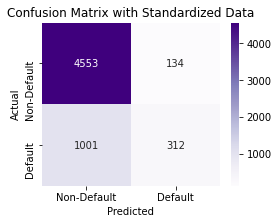

In [18]:
log_std = LogisticRegression(random_state=42)
log_std.fit(Xstd_train, ystd_train)
y_pred = log_std.predict(Xstd_test)

print('Accuracy:', metrics.accuracy_score(y_pred,ystd_test))

#5-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

cv_scores = cross_val_score(log_std, stdX, y, cv=5)
print()

print(classification_report(y_pred, ystd_test))
print()

print("Average 5-Fold Cross-Validation Score: {}".format(round(np.mean(cv_scores),4)),
", Standard Deviation: {}".format(round(np.std(cv_scores),4)))

print('Accuracy:', metrics.accuracy_score(y_pred,ystd_test))

plt.figure(figsize=(4,3))

new_pred = log_std.predict(Xstd_test)

#generating confusion matrix
conf_mat = confusion_matrix(ystd_test, new_pred)

#heatmap
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Purples",
xticklabels = ['Non-Default', 'Default'],
yticklabels = ['Non-Default', 'Default'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix with Standardized Data")


In [19]:
f = f1_score(ystd_test, new_pred)
npre = precision_score(ystd_test, new_pred)
nre = recall_score(ystd_test, new_pred)
nacc = accuracy_score(ystd_test, new_pred)

print("f-1 Score:",f)
print("Precision Score:",npre)
print("Recall Score:",nre)
print("Accuracy:",nacc)

f-1 Score: 0.3547470153496305
Precision Score: 0.6995515695067265
Recall Score: 0.2376237623762376
Accuracy: 0.8108333333333333


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a2ef959e-644b-49ba-838b-a88868d44d86' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>